# Exploration of SMILES to pIC50 using CovNet

#### Use padding and masking be able to use larger batch sizes for training

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"


In [ ]:
import mytoolbox as mtb


# Use hERG dataset

Populating the interactive namespace from numpy and matplotlib


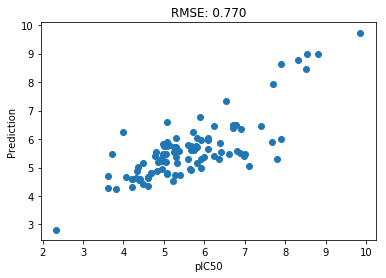

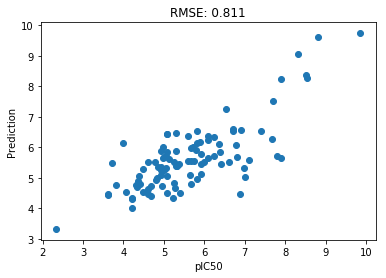

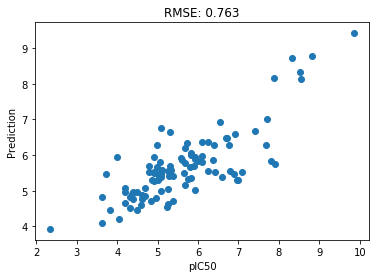

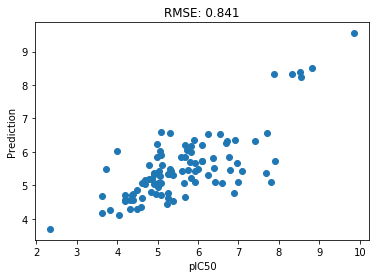

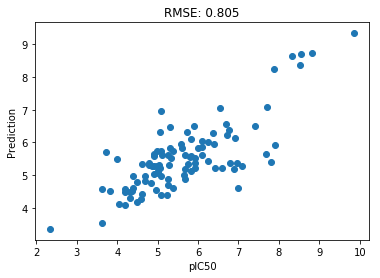

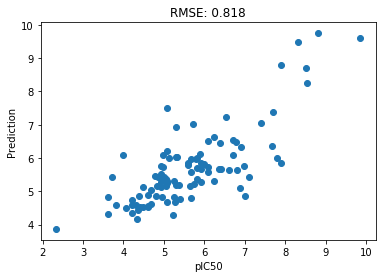

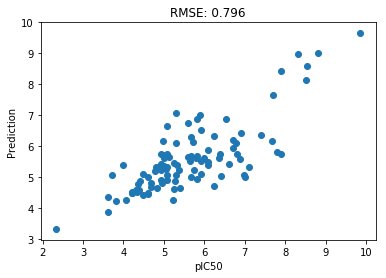

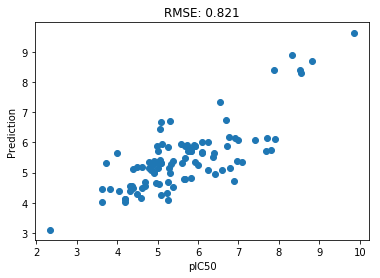

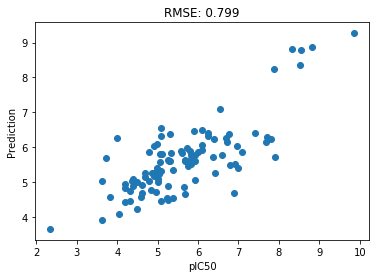

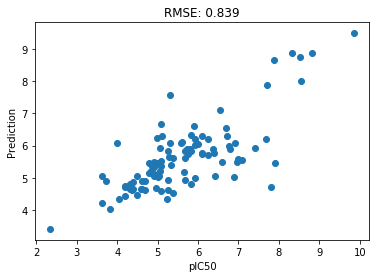

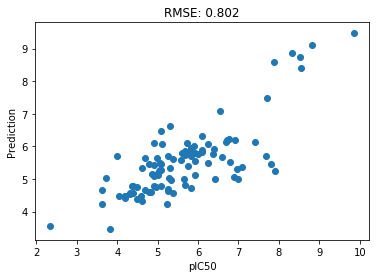

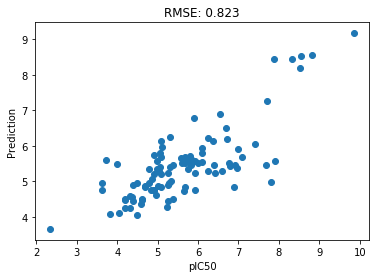

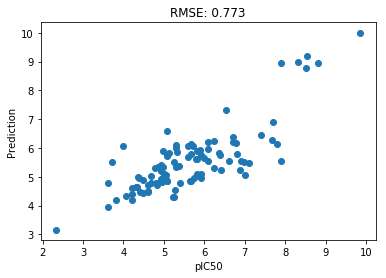

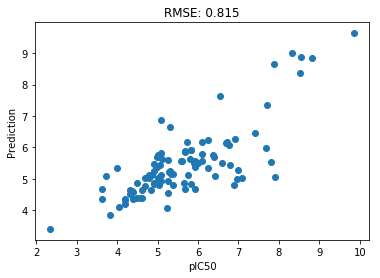

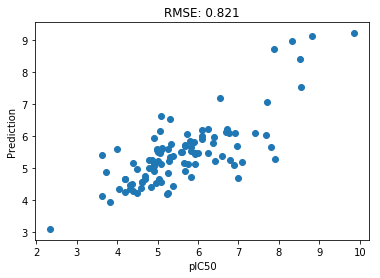

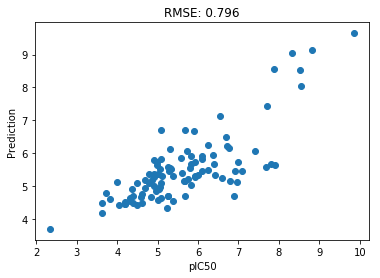

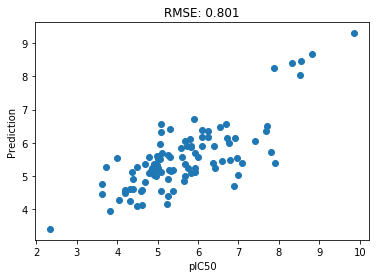

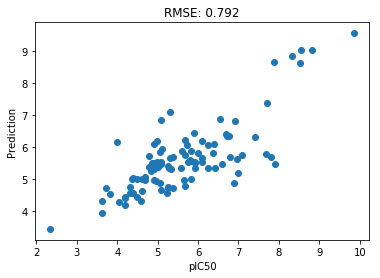

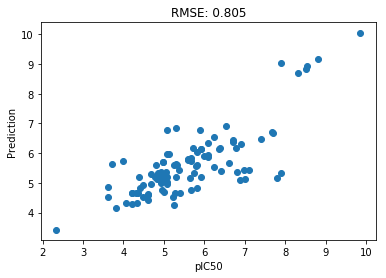

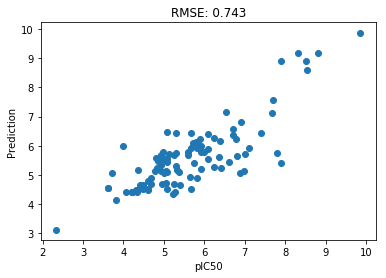

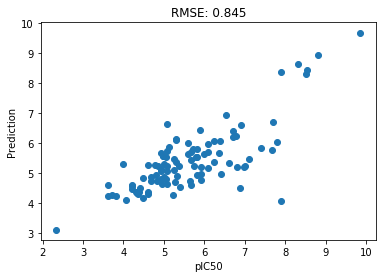

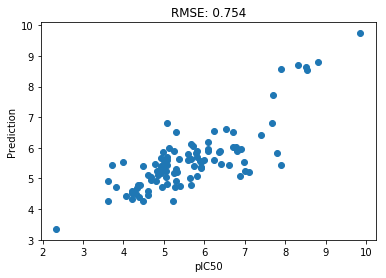

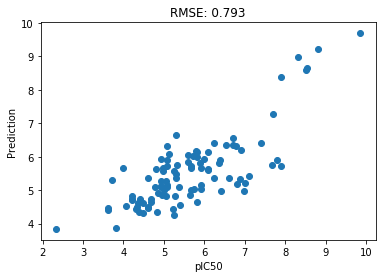

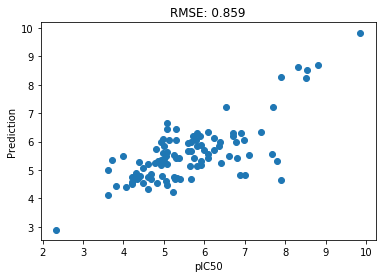

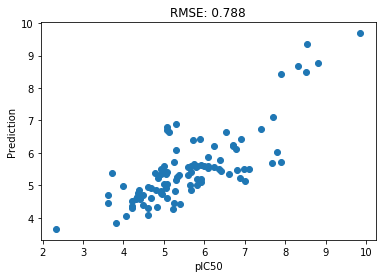

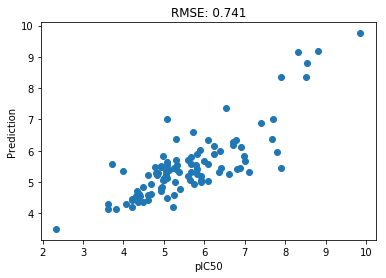

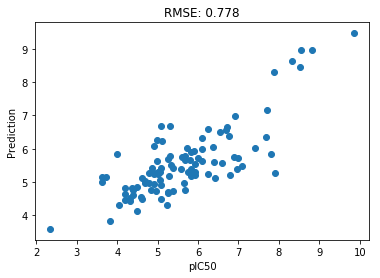

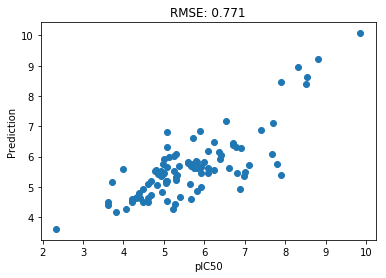

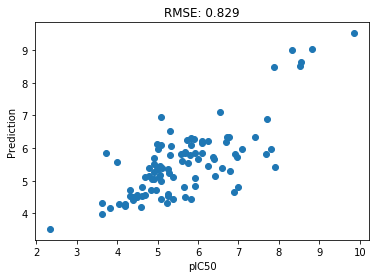

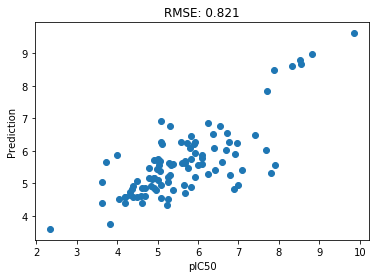

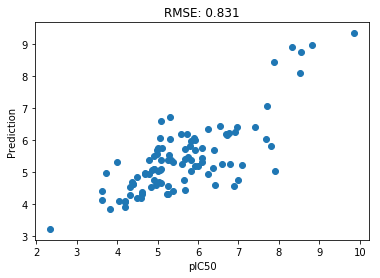

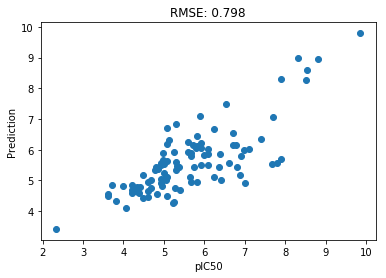

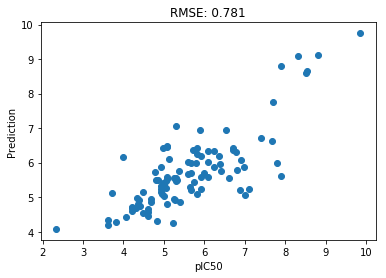

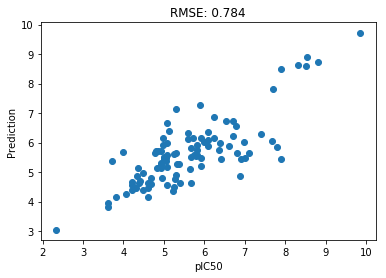

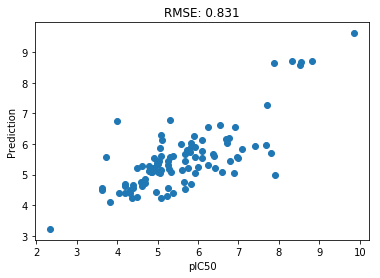

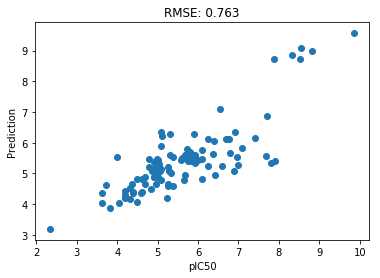

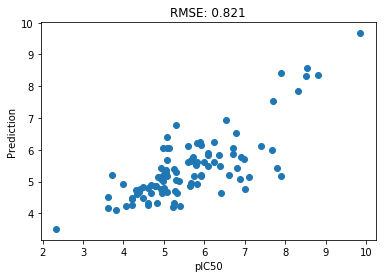

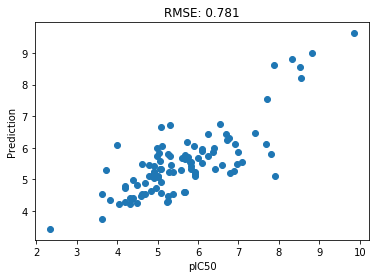

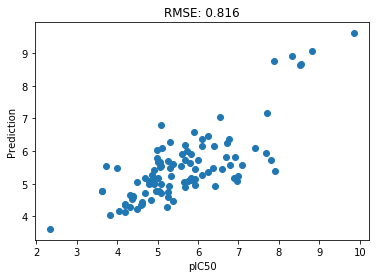

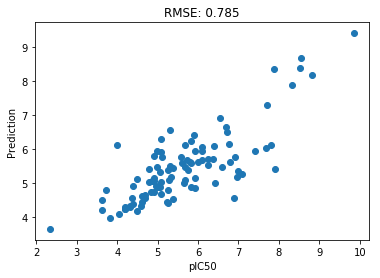

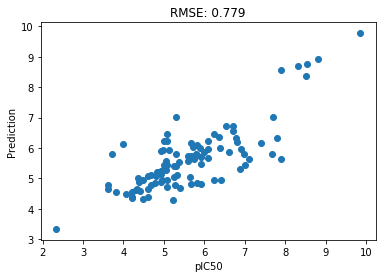

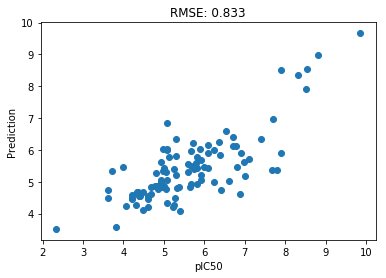

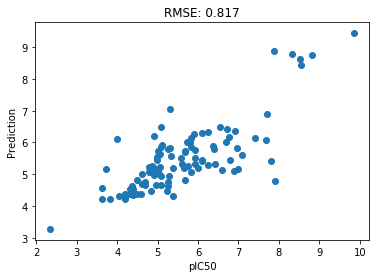

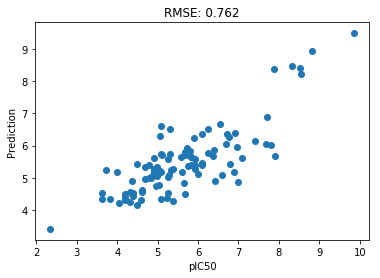

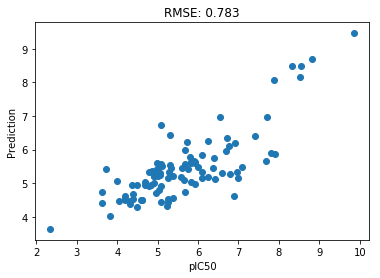

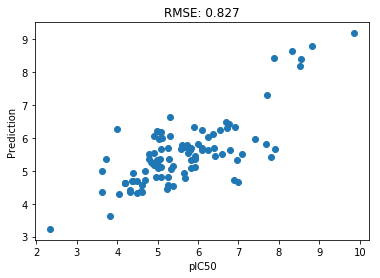

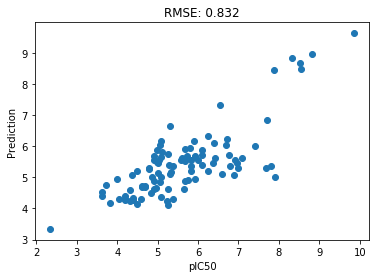

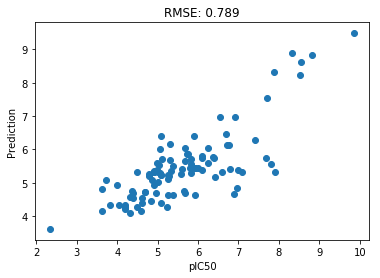

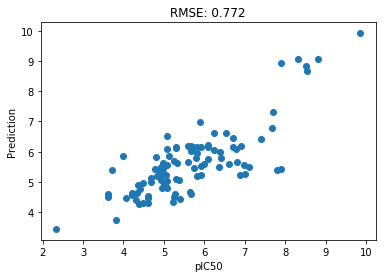

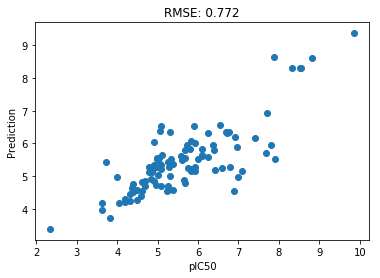

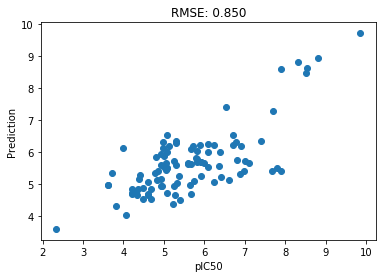

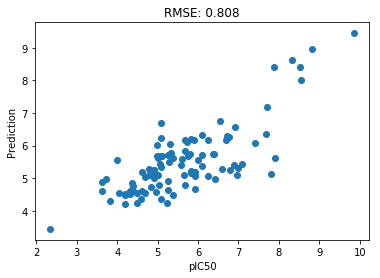

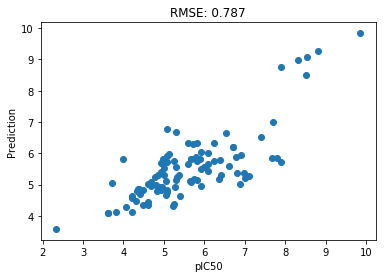

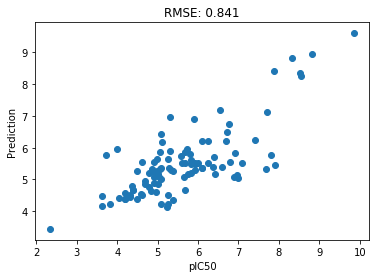

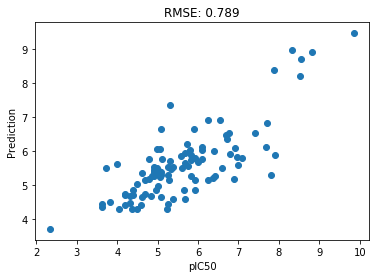

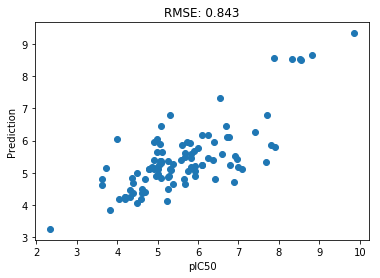

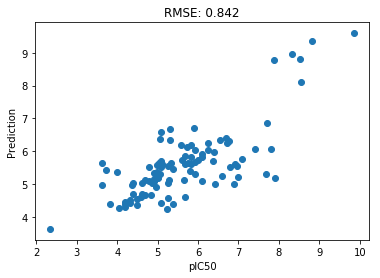

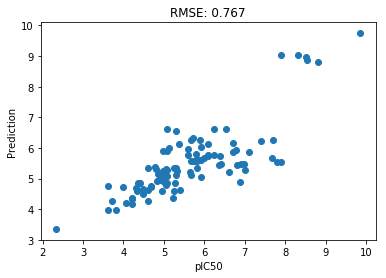

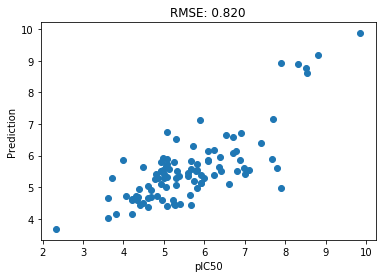

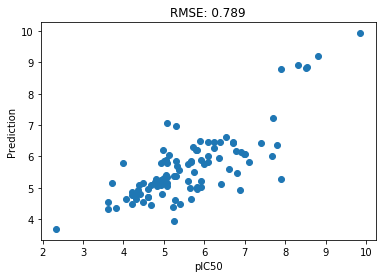

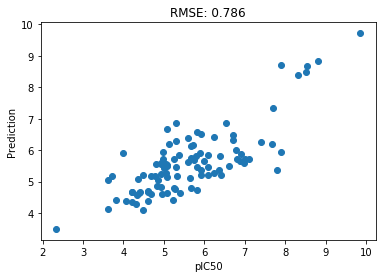

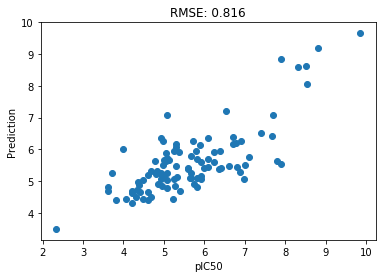

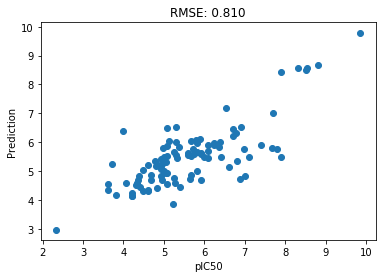

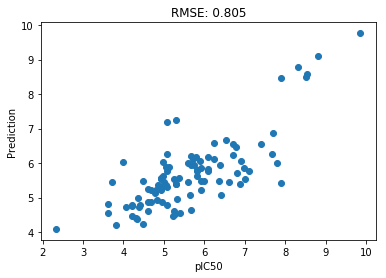

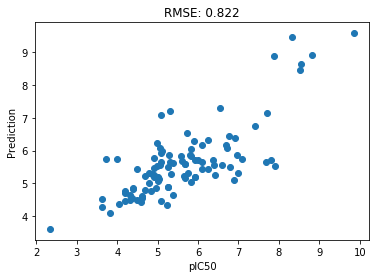

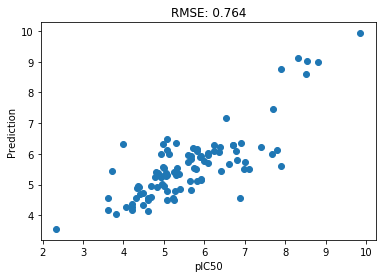

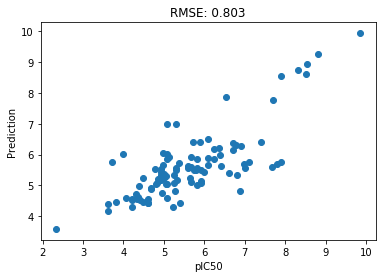

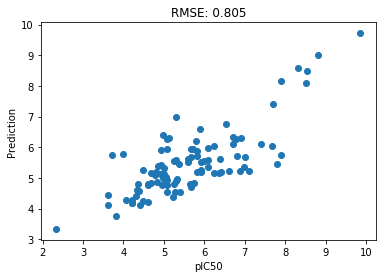

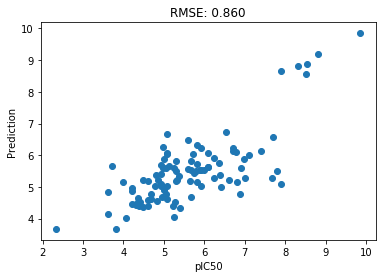

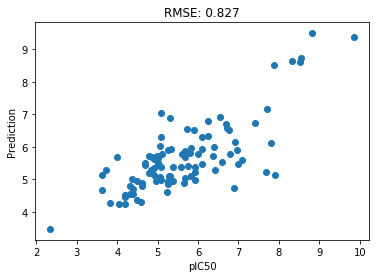

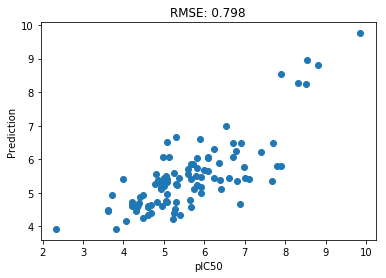

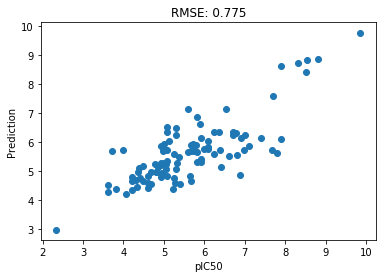

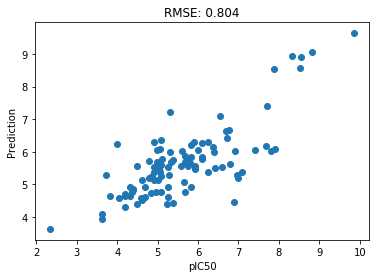

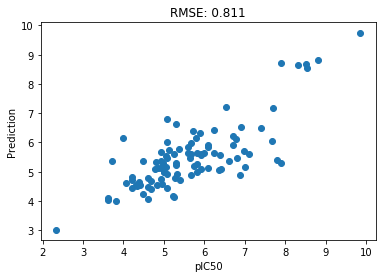

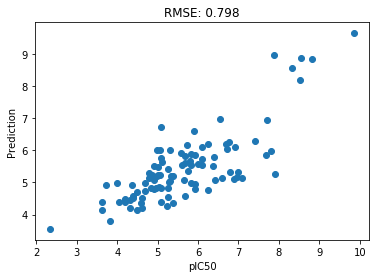

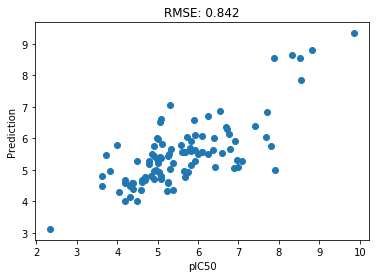

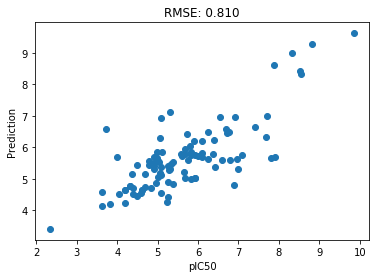

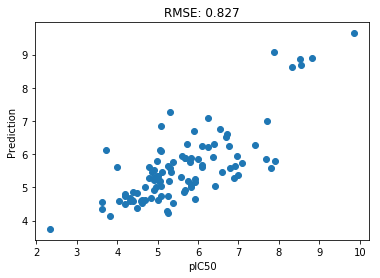

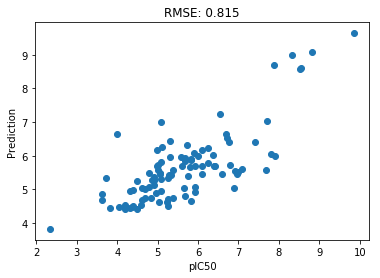

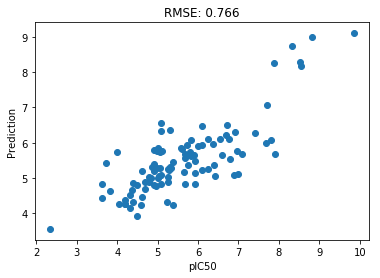

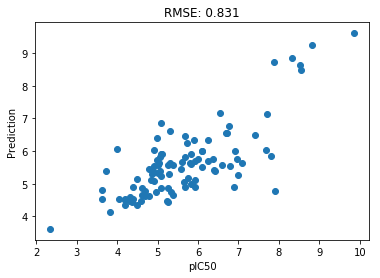

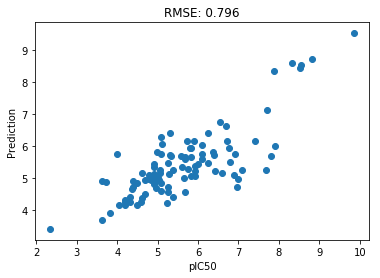

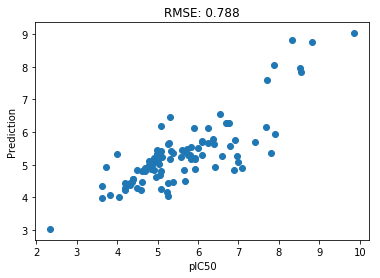

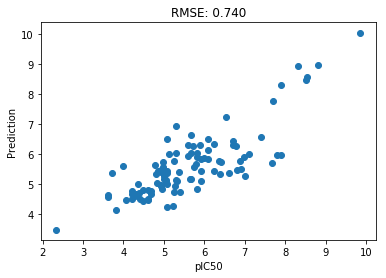

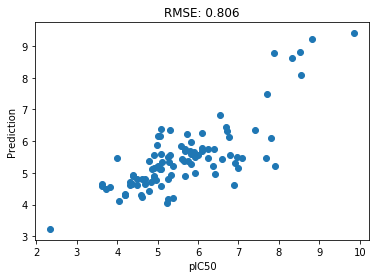

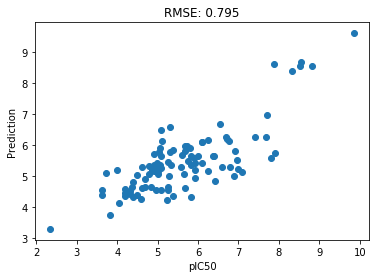

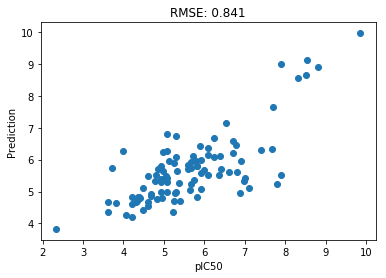

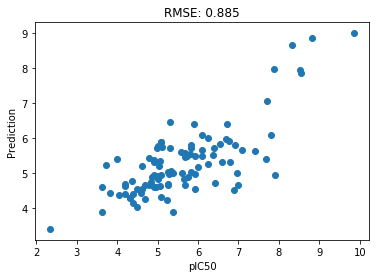

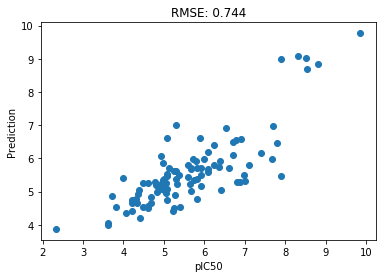

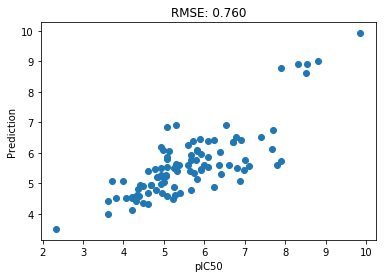

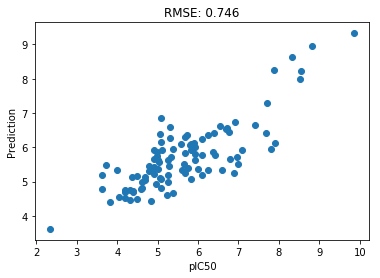

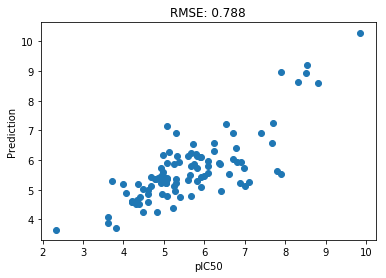

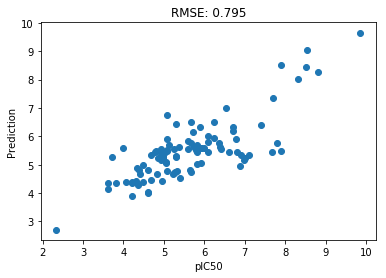

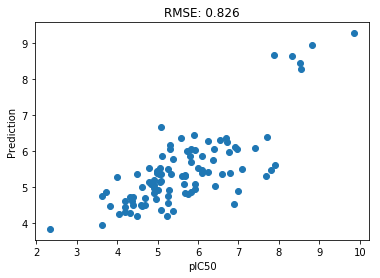

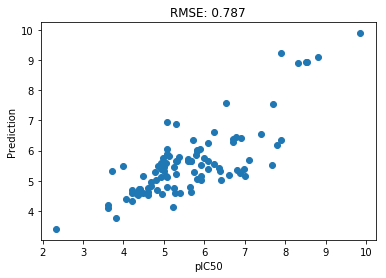

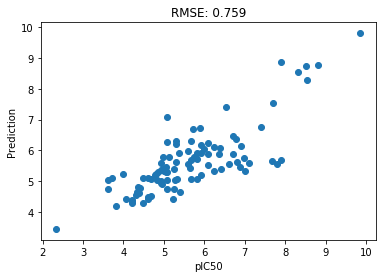

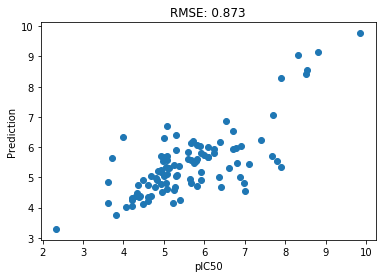

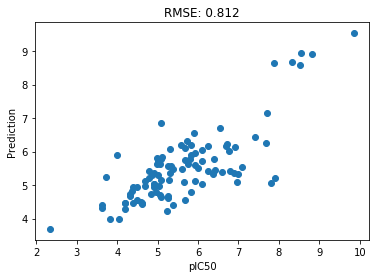

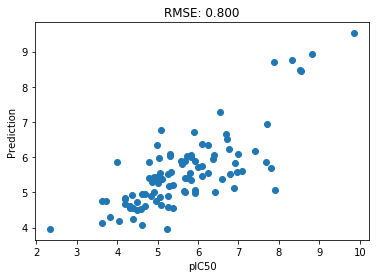

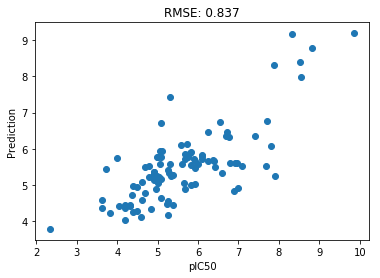

In [2]:
%pylab inline
import random
import string
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Masking, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import mean_squared_error

random.seed(132)

train = pd.read_csv('~/datasets/hERG-ML-study/hERG-Regression-Dataset.csv')
test = pd.read_csv('~/datasets/hERG-ML-study/hERG-Regression-Dataset_testset1.csv')

X = train.smiles.values
y = train.pIC50
MAXLENGTH = train.smiles.str.len().max()
del train

NAMESPACE = []
for elements in [list(set(s)) for s in X]:
    for element in elements:
        if element not in NAMESPACE:
            NAMESPACE.append(element)

BATCH_SIZE = 10
NAMESPACELENGTH = len(NAMESPACE)

def generate_encoding():
    encoding = {}
    for i, letter in enumerate(NAMESPACE):
        encoding[letter] = i
    return encoding

ENCODING = generate_encoding()

def letter_to_vec(letter):
    vec = np.zeros(NAMESPACELENGTH)
    if letter in ENCODING.keys():
        vec[ENCODING[letter]] = 1        
    return vec

def word_to_matrix(word):
    return np.array([letter_to_vec(letter) for letter in word])

def add_padding(s, max_length=MAXLENGTH):
    s += ' '*(MAXLENGTH-len(s))
    return s

X = np.array([add_padding(x) for x in X])
X = np.array([word_to_matrix(x) for x in X])

# generate test set
X_test = test.smiles.values
X_test = np.array([add_padding(x) for x in X_test])
X_test = np.array([word_to_matrix(x) for x in X_test])
y_test = test.pIC50
del test

# Train model
def generate_model():
    model = Sequential()
    model.add(Conv1D(32, kernel_size=10, strides=1,
                     activation='relu', padding='same',
                     input_shape=(MAXLENGTH, NAMESPACELENGTH)))
    model.add(MaxPooling1D(pool_size=4, strides=2))
    model.add(Conv1D(64, 8, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=4))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', 
                  optimizer='adam', metrics=['mean_squared_error'])    
    return model

rmses = []
for i in range(100):
    model = generate_model()
    model.fit(X, y, epochs=30, batch_size=10, verbose=0)
    rmse = np.sqrt(mean_squared_error(model.predict(X_test), y_test))
    scatter(y_test, model.predict(X_test))
    xlabel('pIC50')
    ylabel('Prediction')
    title('RMSE: %03.3f' %(rmse))
    show()
    rmses.append(rmse)

100


{'whiskers': [<matplotlib.lines.Line2D at 0x7faf656ede80>,
 'caps': [<matplotlib.lines.Line2D at 0x7faf656edc18>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb4149355f8>],
 'medians': [<matplotlib.lines.Line2D at 0x7faf64f488d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7faf654323c8>],
 'means': []}

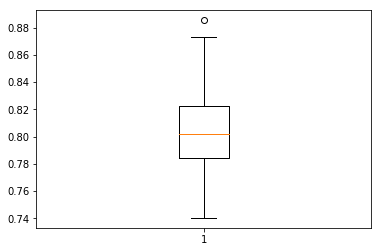

In [3]:
print(len(rmses))
boxplot(rmses)

Populating the interactive namespace from numpy and matplotlib


/home/swacker/miniconda3/envs/py3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Epoch 1/30
600/600 [==============================] - 6s 10ms/step - loss: 4.1486 - mean_squared_error: 4.1486
Epoch 2/30
600/600 [==============================] - 0s 518us/step - loss: 0.9484 - mean_squared_error: 0.9484
Epoch 3/30
600/600 [==============================] - 0s 499us/step - loss: 0.6789 - mean_squared_error: 0.6789
Epoch 4/30
600/600 [==============================] - 0s 517us/step - loss: 0.5426 - mean_squared_error: 0.5426
Epoch 5/30
600/600 [==============================] - 0s 552us/step - loss: 0.4429 - mean_squared_error: 0.4429
Epoch 6/30
600/600 [==============================] - 0s 578us/step - loss: 0.3433 - mean_squared_error: 0.3433
Epoch 7/30
600/600 [==============================] - 0s 562us/step - loss: 0.2667 - mean_squared_error: 0.2667
Epoch 8/30
600/600 [==============================] - 0s 586us/step - loss: 0.2044 - mean_squared_error: 0.2044
Epoch 9/30
600/600 [==============================] - 0s 565us/step - loss: 0.1761 - mean_squared_error: 

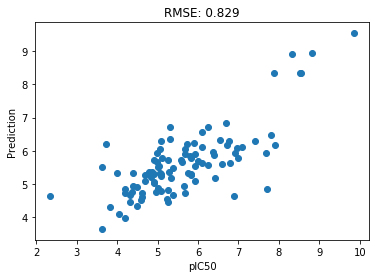

In [4]:
%pylab inline
import random
import string
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Masking, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import mean_squared_error

random.seed(132)

train = pd.read_csv('~/datasets/hERG-ML-study/hERG-Regression-Dataset.csv')
test = pd.read_csv('~/datasets/hERG-ML-study/hERG-Regression-Dataset_testset1.csv')

X = train.smiles.values
y = train.pIC50
MAXLENGTH = train.smiles.str.len().max()
del train

NAMESPACE = []
for elements in [list(set(s)) for s in X]:
    for element in elements:
        if element not in NAMESPACE:
            NAMESPACE.append(element)

BATCH_SIZE = 10
NAMESPACELENGTH = len(NAMESPACE)

def generate_encoding():
    encoding = {}
    for i, letter in enumerate(NAMESPACE):
        encoding[letter] = i
    return encoding

ENCODING = generate_encoding()

def letter_to_vec(letter):
    vec = np.zeros(NAMESPACELENGTH)
    if letter in ENCODING.keys():
        vec[ENCODING[letter]] = 1        
    return vec

def word_to_matrix(word):
    return np.array([letter_to_vec(letter) for letter in word])

def add_padding(s, max_length=MAXLENGTH):
    s += ' '*(MAXLENGTH-len(s))
    return s

X = np.array([add_padding(x) for x in X])
X = np.array([word_to_matrix(x) for x in X])

# generate test set
X_test = test.smiles.values
X_test = np.array([add_padding(x) for x in X_test])
X_test = np.array([word_to_matrix(x) for x in X_test])
y_test = test.pIC50
del test

# Train model
from tensorflow.python.keras.layers import BatchNormalization

def generate_model():
    model = Sequential()
    model.add(Conv1D(32, kernel_size=5, strides=1,
                     activation='relu', padding='same',
                     input_shape=(MAXLENGTH, NAMESPACELENGTH)))
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Conv1D(64, 8, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(200, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', 
                  optimizer='adam', metrics=['mean_squared_error'])    
    return model


model = generate_model()
model.fit(X, y, epochs=30, batch_size=10, verbose=1)
rmse = np.sqrt(mean_squared_error(model.predict(X_test), y_test))
scatter(y_test, model.predict(X_test))
xlabel('pIC50')
ylabel('Prediction')
title('RMSE: %03.3f' %(rmse))
show()

# Integrating logP as a second source of information

In [ ]:
%pylab inline
import random
import string
import pandas as pd
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Masking, Conv1D, MaxPooling1D, Flatten
from tensorflow.python.keras import backend as K
from tensorflow.python.keras import losses
from sklearn.metrics import mean_squared_error
import numpy as np

from tensorflow.python.keras import backend as K
from tensorflow.python.keras import losses
def masked_loss_function(y_true, y_pred, mask_value=0):
    '''
    This model has two target values which are independent of each other.
    We mask the output so that only the value that is used for training 
    contributes to the loss.
        mask_value : is the value that is not used for training
    '''
    mask = K.cast(K.not_equal(y_true, mask_value), K.floatx())
    return losses.mean_squared_error(y_true * mask, y_pred * mask)

random.seed(132)

train = pd.read_csv('~/datasets/hERG-ML-study/hERG-Regression-Dataset.csv')
test = pd.read_csv('~/datasets/hERG-ML-study/hERG-Regression-Dataset_testset1.csv')
logp = pd.read_csv('/home/swacker/datasets/ncidb-release2/experimental_logP.csv')


X = train.smiles.values
y = train.pIC50.values

X2 = logp.SMILES.values
y2 = logp['Experimental logP'].values

MAXLENGTH = logp.SMILES.str.len().max()
del train

# convert y values
y = np.array([np.array([0,i]) for i in y])
y2 = np.array([np.array([i,0]) for i in y2])

NAMESPACE = []
for elements in [list(set(s)) for s in list(X)+list(X2)]:
    for element in elements:
        if element not in NAMESPACE:
            NAMESPACE.append(element)

BATCH_SIZE = 10
NAMESPACELENGTH = len(NAMESPACE)

def generate_encoding():
    encoding = {}
    for i, letter in enumerate(NAMESPACE):
        encoding[letter] = i
    return encoding

ENCODING = generate_encoding()

def letter_to_vec(letter):
    vec = np.zeros(NAMESPACELENGTH)
    if letter in ENCODING.keys():
        vec[ENCODING[letter]] = 1        
    return vec

def word_to_matrix(word):
    return np.array([letter_to_vec(letter) for letter in word])

def add_padding(s, max_length=MAXLENGTH):
    s += ' '*(max_length-len(s))
    return s

X = np.array([add_padding(x) for x in X])
X = np.array([word_to_matrix(x) for x in X])
X2 = np.array([add_padding(x) for x in X2])
X2 = np.array([word_to_matrix(x) for x in X2])

# generate test set
X_test = test.smiles.values
X_test = np.array([add_padding(x) for x in X_test])
X_test = np.array([word_to_matrix(x) for x in X_test])
y_test = np.array([np.array([0,i]) for i in test.pIC50.values])

del test

# Train model
def generate_model():
    model = Sequential()
    model.add(Conv1D(32, kernel_size=5, strides=1,
                     activation='relu', padding='same',
                     input_shape=(MAXLENGTH, NAMESPACELENGTH)))
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Conv1D(64, 8, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='linear'))
    model.compile(loss=masked_loss_function, 
                  optimizer='adam', metrics=['mean_squared_error'])    
    return model

Populating the interactive namespace from numpy and matplotlib


/home/swacker/miniconda3/envs/py3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
N_rep = 20
epochs = 100
batch_size = 16

def evaluate_current(model):
    target = y_test[:,1]
    prediction = model.predict(X_test)[:,1]
    rmse = np.sqrt(mean_squared_error(target, prediction))
    scatter(target, prediction)
    xlabel('pIC50')
    ylabel('Prediction')
    title('RMSE: %03.3f' %(rmse))
    show()
    return rmse

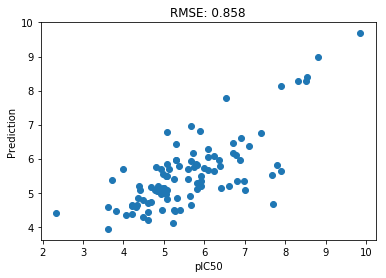

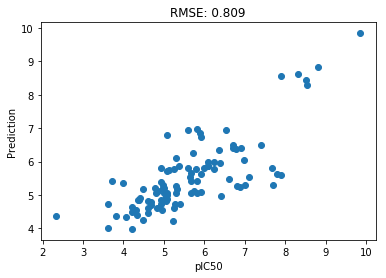

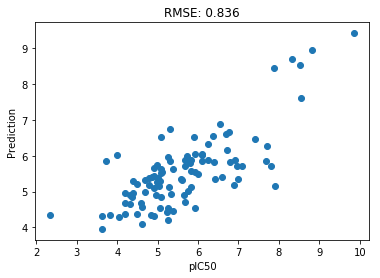

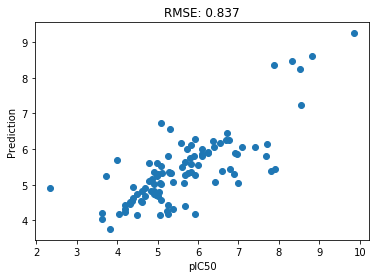

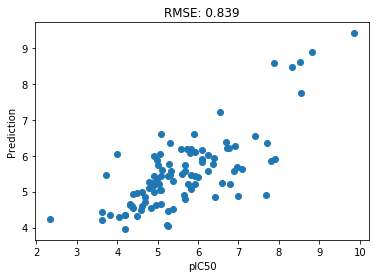

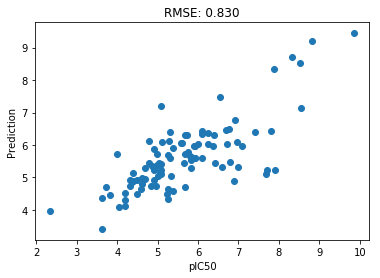

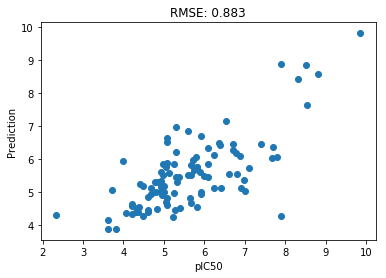

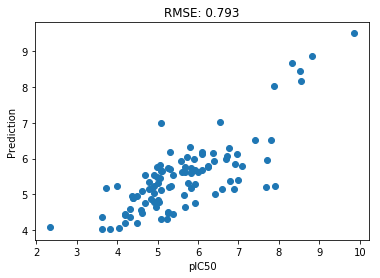

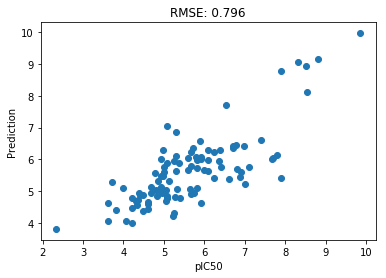

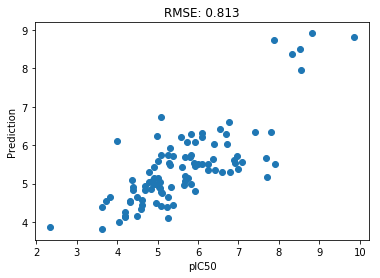

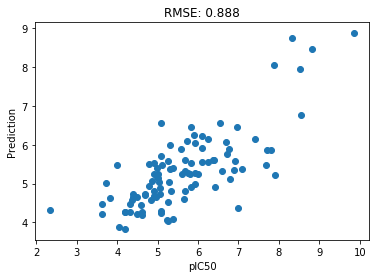

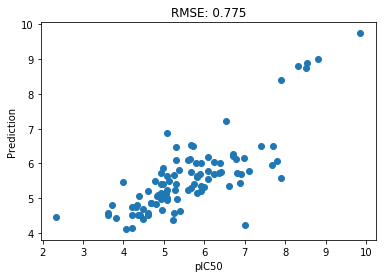

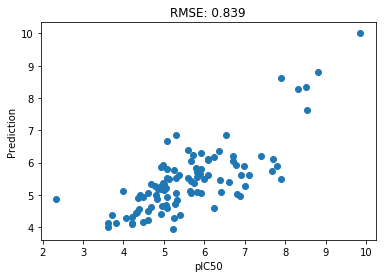

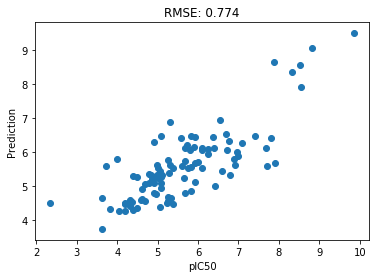

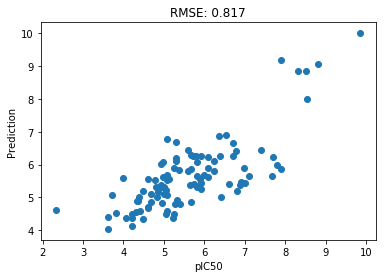

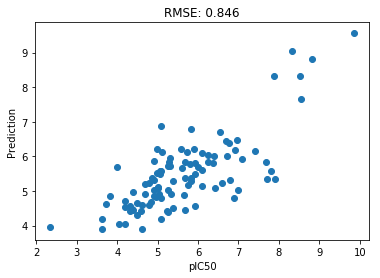

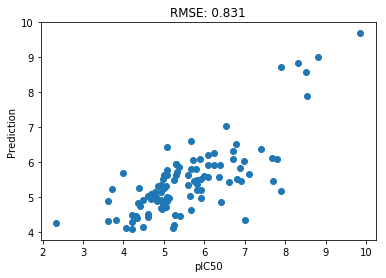

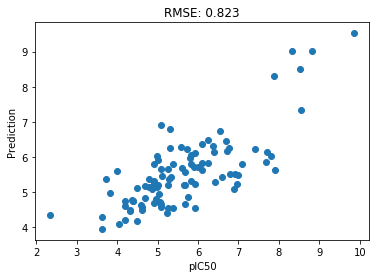

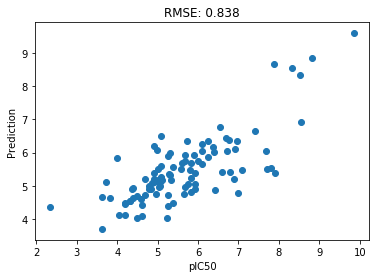

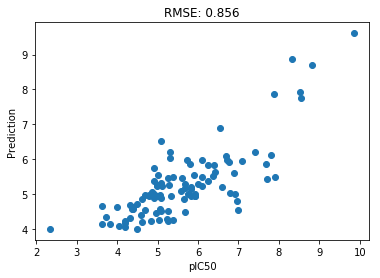

In [ ]:
def strategy_1():
    '''
    Using no logP data at all´.'''
    model = generate_model()
    model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)
    return evaluate_current(model)

rmses_1 = [strategy_1() for _ in range(N_rep)]

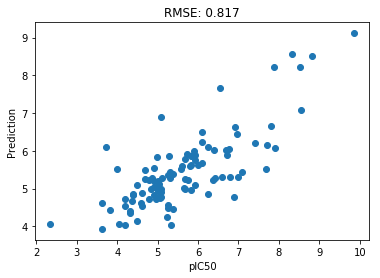

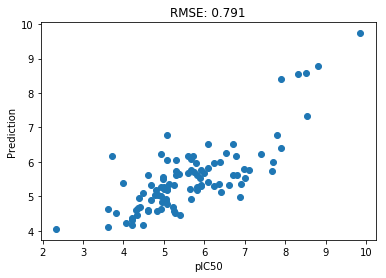

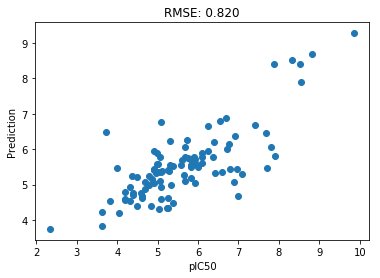

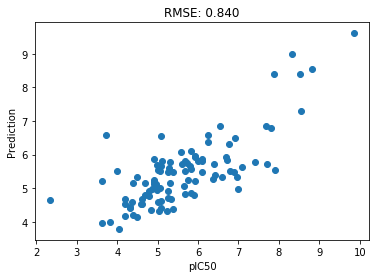

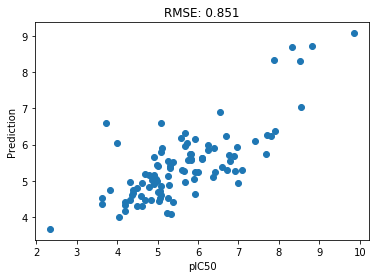

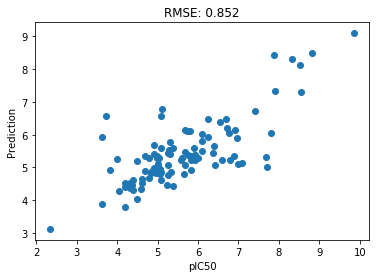

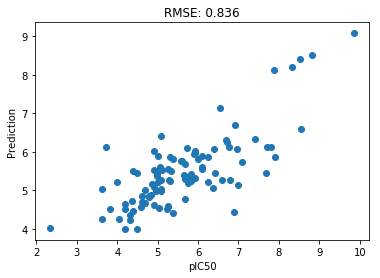

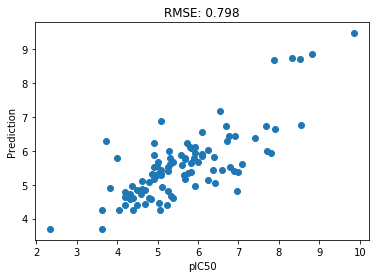

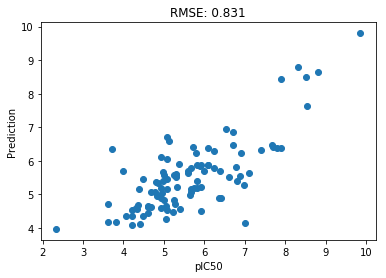

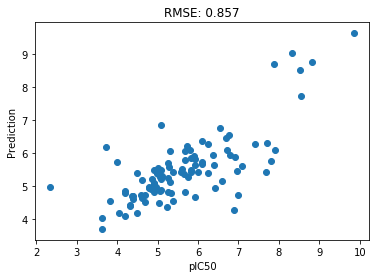

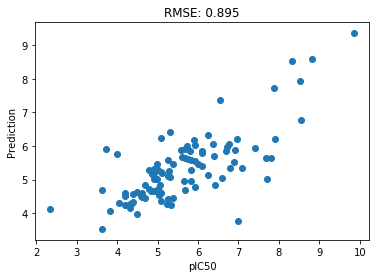

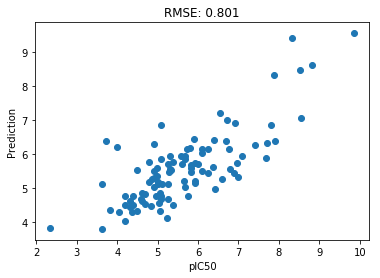

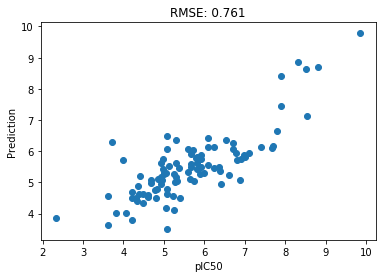

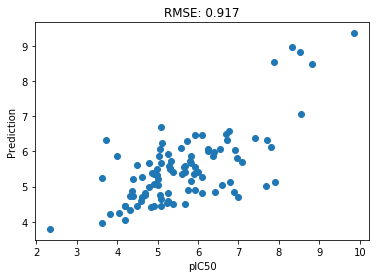

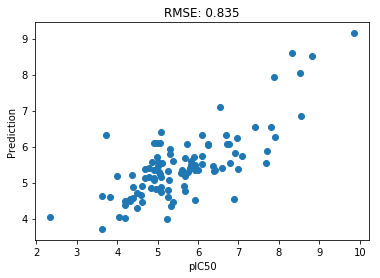

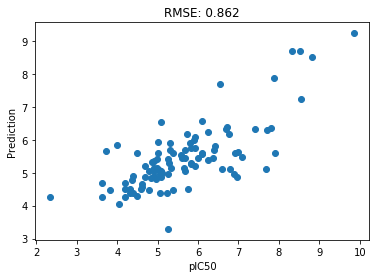

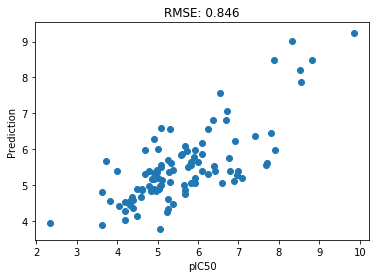

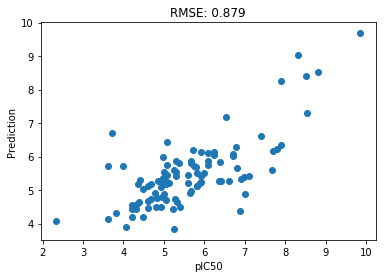

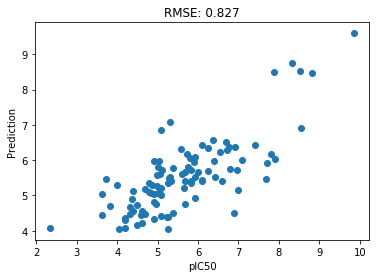

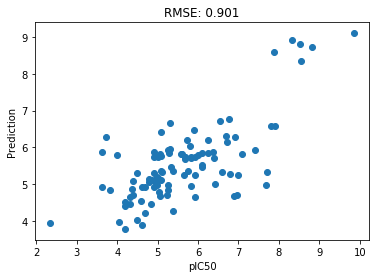

In [ ]:
def strategy_2():
    '''
    Pretrain the model with logP values.
    '''
    model = generate_model()
    model.fit(X2, y2, epochs=epochs, batch_size=batch_size, verbose=0)
    model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)
    return evaluate_current(model)


rmses_2 = [strategy_2() for _ in range(N_rep)]

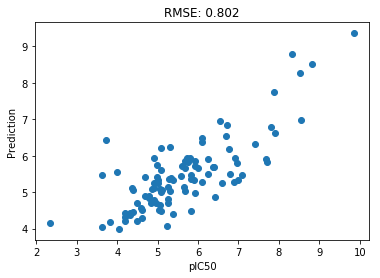

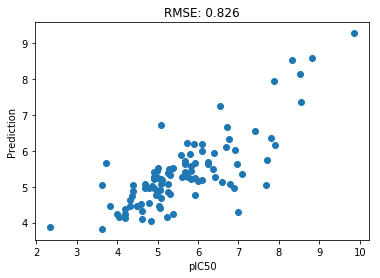

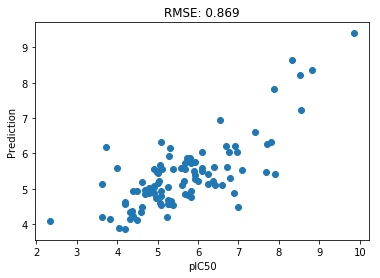

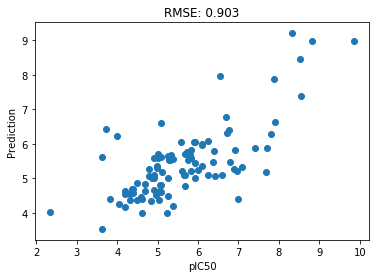

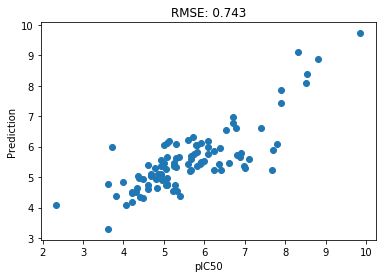

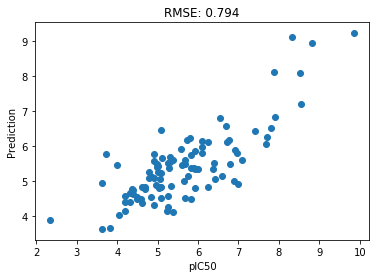

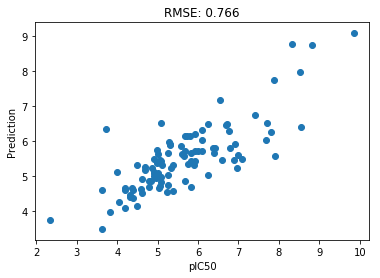

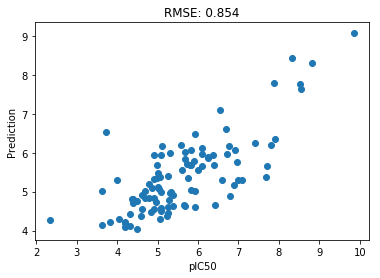

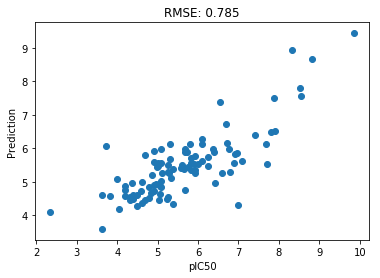

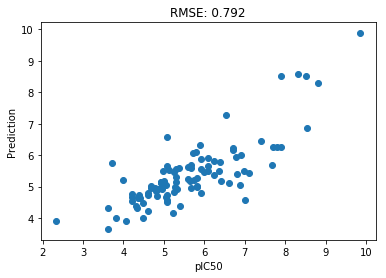

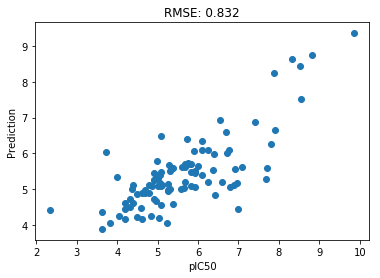

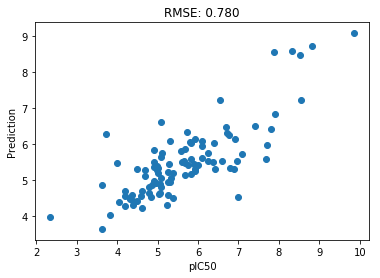

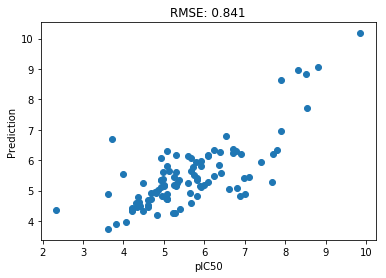

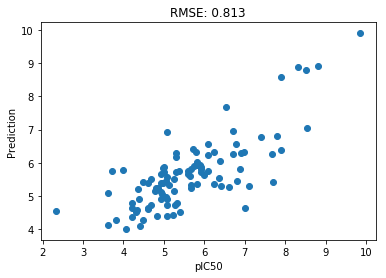

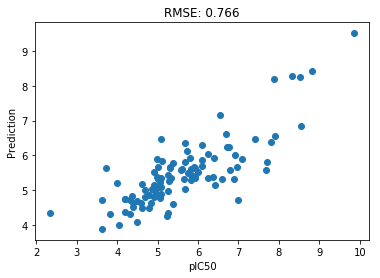

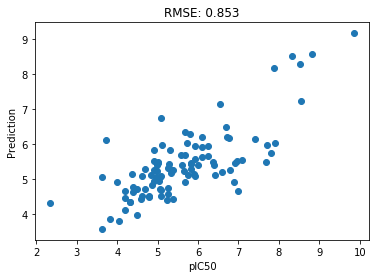

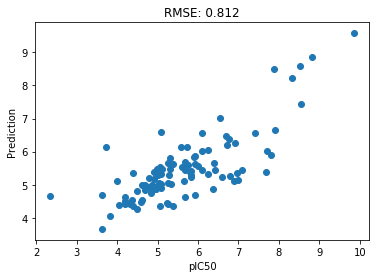

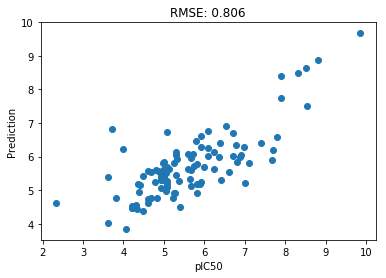

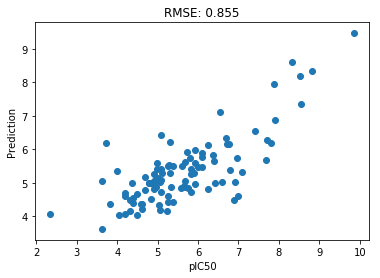

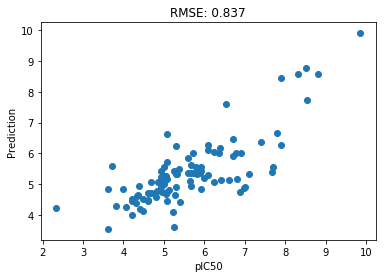

In [ ]:
def strategy_3():
    '''
    Train the model with both datasets at the same time.
    '''
    model = generate_model()
    model.fit(np.append(X,X2, axis=0), np.append(y,y2, axis=0),
              epochs=epochs, batch_size=batch_size, verbose=0)
    return evaluate_current(model)

rmses_3 = [strategy_3() for _ in range(N_rep)]

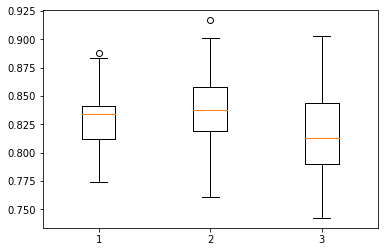

In [ ]:
_ = boxplot([rmses_1, rmses_2, rmses_3])

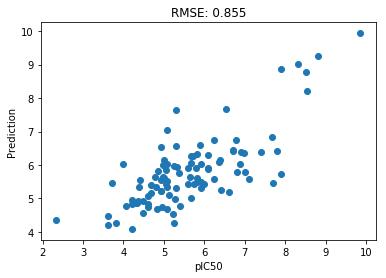

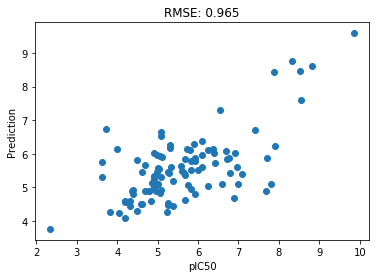

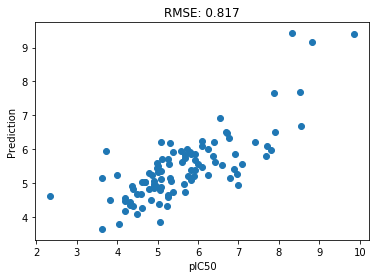

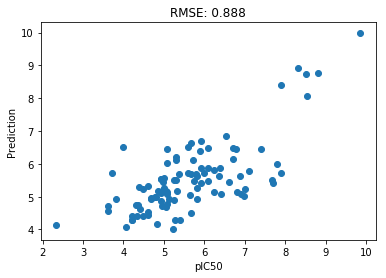

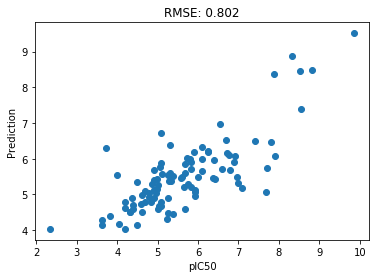

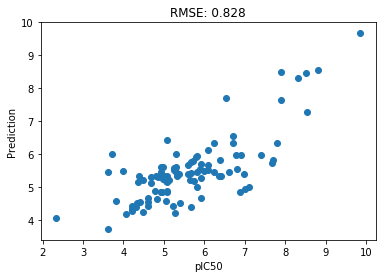

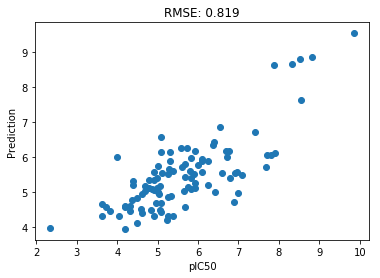

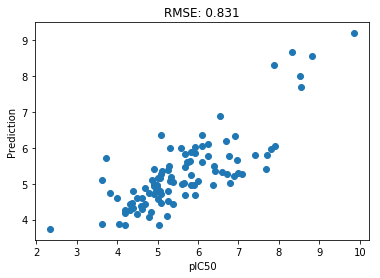

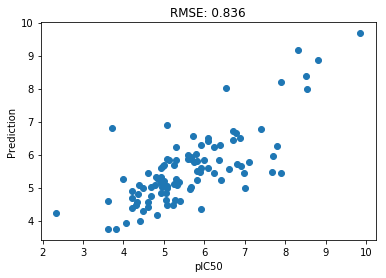

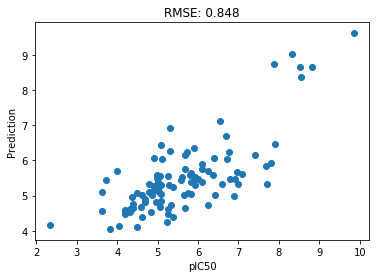

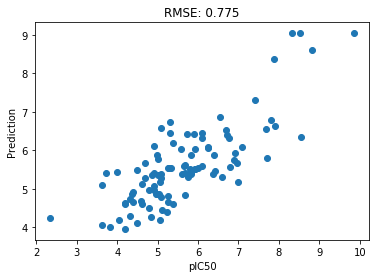

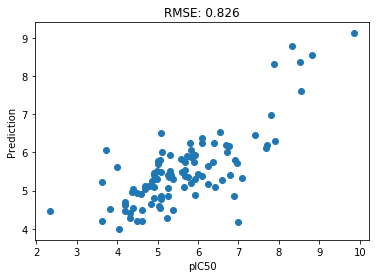

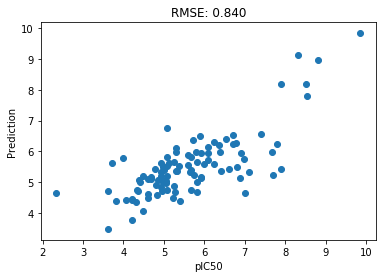

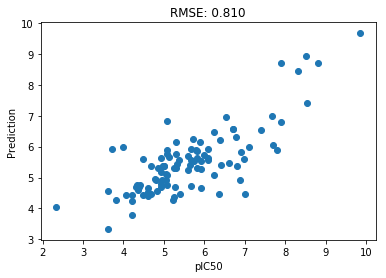

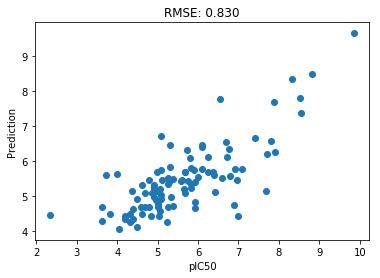

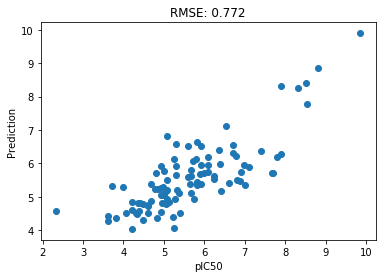

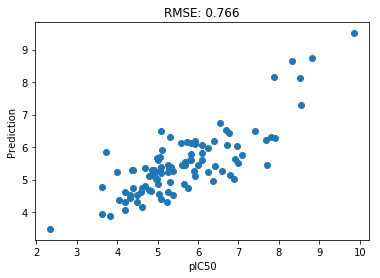

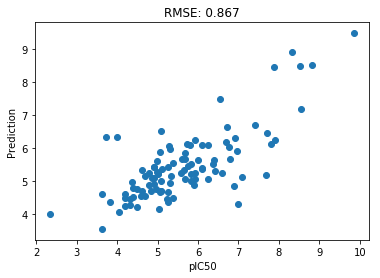

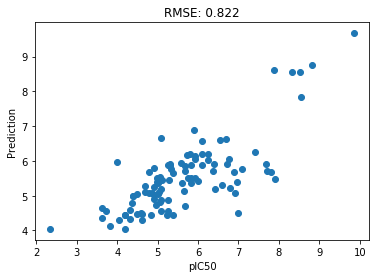

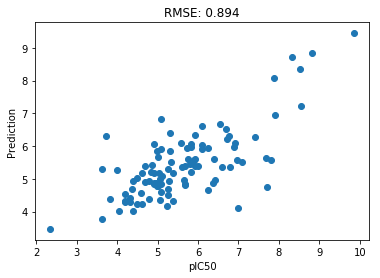

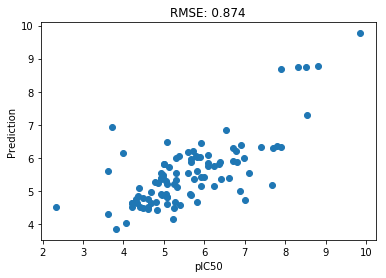

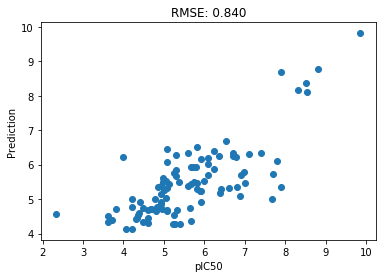

In [ ]:
results = []
for _ in range(N_rep):
    results.append([strategy_1(), strategy_2(), strategy_3()])